In [68]:
import numpy as np
from QAM_EncoderDecoder import * 
import commpy
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
%matplotlib inline

N = 1024
prefix_no = 32
Fs = 441000

## 1. Generate random symbols

In [69]:
random_array = np.random.randint(0,100, int(50/4))
random_array

array([51,  5, 75, 96, 81, 25, 93, 19, 18, 84, 32, 18])

In [70]:
bin_strings=''
for byte in random_array:
    binary_string = '{0:08b}'.format(byte)
    bin_strings+=binary_string
bin_strings

'001100110000010101001011011000000101000100011001010111010001001100010010010101000010000000010010'

In [71]:
symbols = encode_bitstr2symbols(bin_strings)
len(symbols)

about to do encode_bitstr2symbols encoding
encode_bitstr2symbols encoding finished


48

In [72]:
constellation = encode_bitstr2symbols(bin_strings)
len(constellation)

about to do encode_bitstr2symbols encoding
encode_bitstr2symbols encoding finished


48

In [73]:
#----iDFT----
frames=np.fft.ifft(constellation)
        

# ----add cyclic prefix----
cyclic_prefix = frames[len(constellation)-prefix_no:len(constellation)]
        
frames = np.append(cyclic_prefix, frames, axis=0)        

###  1.1 Concatenate the chirp signal 


In [62]:
_,chirp = read('chirp_log.wav')

In [63]:
combined = np.concatenate((chirp, frames))

## 2. Transmitted this signal to the phone and play and record with python

In [64]:
import sounddevice as sd
fs = 44100  # Sample rate
seconds = 4  # Duration of recording
recorded = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()

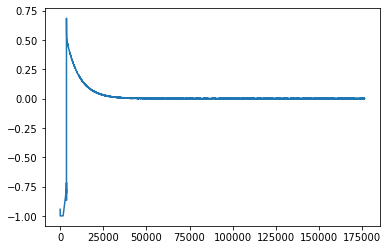

In [67]:
plt.plot(recorded)

## 3. Decode the received audio

In [9]:
recorded = np.ndarray.flatten(recorded)
recorded.shape

(132300,)

### 3.1 Use chirp to sync the starting point by trimming the chirp signal and empty signal

Add zeros (padding) to make recorded sequence divisible by 1056

In [10]:
for i in range(1056 - (len(recorded) % 1056)):
    recorded = np.append(recorded, [0])

recorded = recorded.reshape((-1,1056))
recorded.shape

(126, 1056)

In [11]:
OFDMframes_to_constellation(recorded,N,prefix_no)

array([ 0.36801147+0.j        ,  0.26756435-0.21303013j,
        0.06621145-0.26453167j, ..., -0.06343737+0.1713349j ,
        0.06621145+0.26453167j,  0.26756435+0.21303013j])

#### 3.1 Divide by the transmitted constellation 

In [ ]:
# TODo Requires sync
synced = 

In [ ]:
channel_response_frequency = synced / symbols

### 4. Take iDFT to get the channel impulse response